In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(['customerID'],axis =1, inplace = True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df1 = df.dropna()

In [8]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()].shape

(11, 20)

In [11]:
df.shape

(7043, 20)

In [12]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Ankit Rawat\AppData\Local\Temp\ipykernel_12112\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} :{df[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [27]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\Users\Ankit Rawat\AppData\Local\Temp\ipykernel_12112\3179917863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\Ankit Rawat\AppData\Local\Temp\ipykernel_12112\3179917863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [28]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [30]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

C:\Users\Ankit Rawat\AppData\Local\Temp\ipykernel_12112\3409627344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace = True)


In [31]:
print_unique_col_values(df1)

gender :['Female' 'Male']
InternetService :['DSL' 'Fiber optic' 'No']
Contract :['Month-to-month' 'One year' 'Two year']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
for column in df1:
    print(f'{column} :{df1[column].unique()}')

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :[1 0]
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]


In [36]:
df1['gender'].replace({'Male':0,'Female':1},inplace=True)

C:\Users\Ankit Rawat\AppData\Local\Temp\ipykernel_12112\4275986954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':0,'Female':1},inplace=True)


In [37]:
for column in df1:
    print(f'{column} :{df1[column].unique()}')

gender :[1 0]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :[1 0]
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]


In [40]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract','PaymentMethod'])

In [42]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [47]:
x = df2.drop('Churn',axis=1)


In [48]:
y= df2.Churn

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [51]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 17s 7ms/step - loss: 0.4973 - accuracy: 0.7602
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4203 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4167 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accur

176/176 [==============================] - 1s 5ms/step - loss: 0.3694 - accuracy: 0.8261
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3701 - accuracy: 0.8274
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3694 - accuracy: 0.8265
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3687 - accuracy: 0.8292
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3692 - accuracy: 0.8306
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3681 - accuracy: 0.8258
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3683 - accuracy: 0.8309
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.8302
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3670 - accuracy: 0.8318
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3667 - accuracy: 

In [52]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 1ms/step - loss: 0.4823 - accuracy: 0.7775


[0.48232072591781616, 0.7775408625602722]

In [56]:
yp = model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.3277282 ],
       [0.4130053 ],
       [0.02079591],
       [0.7261863 ],
       [0.5098186 ],
       [0.7515913 ],
       [0.01041769],
       [0.39640617],
       [0.12762837],
       [0.22583617]], dtype=float32)

In [57]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [59]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.47      0.55       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.78      0.76      1407



Text(69.0, 0.5, 'Truth')

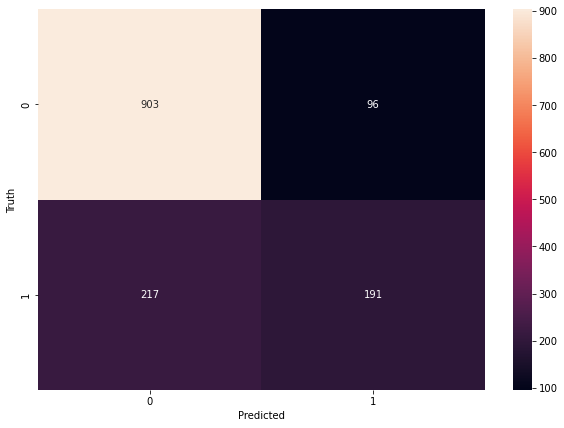

In [62]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
+